In [201]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
def calculate_z (depth,x,y): 
    if x == 0 and y == 0 :
        z = np.nan
        return z 
    else :
        z = round(depth*(x + y)/200, 2)
        return z

In [86]:
diamonds = pd.read_csv('diamonds.csv')
diamonds['z'] = diamonds[['depth','x','y']].apply(lambda z: calculate_z(z['depth'],z['x'],z['y']), axis=1)
diamonds = diamonds.dropna(how='any')
diamonds = diamonds[(diamonds['y']<=11) & (diamonds['y']>=3)]
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48932.000000,48932.000000,48932.000000,48932.000000,48932.000000,48932.000000,48932.000000
mean,0.797735,61.751958,57.451071,3933.531288,5.731378,5.733417,3.539451
std,0.474066,1.429889,2.232990,3988.383829,1.120162,1.111909,0.691405
min,0.200000,43.000000,43.000000,326.000000,0.000000,3.680000,2.040000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.970000


In [ ]:
diamonds

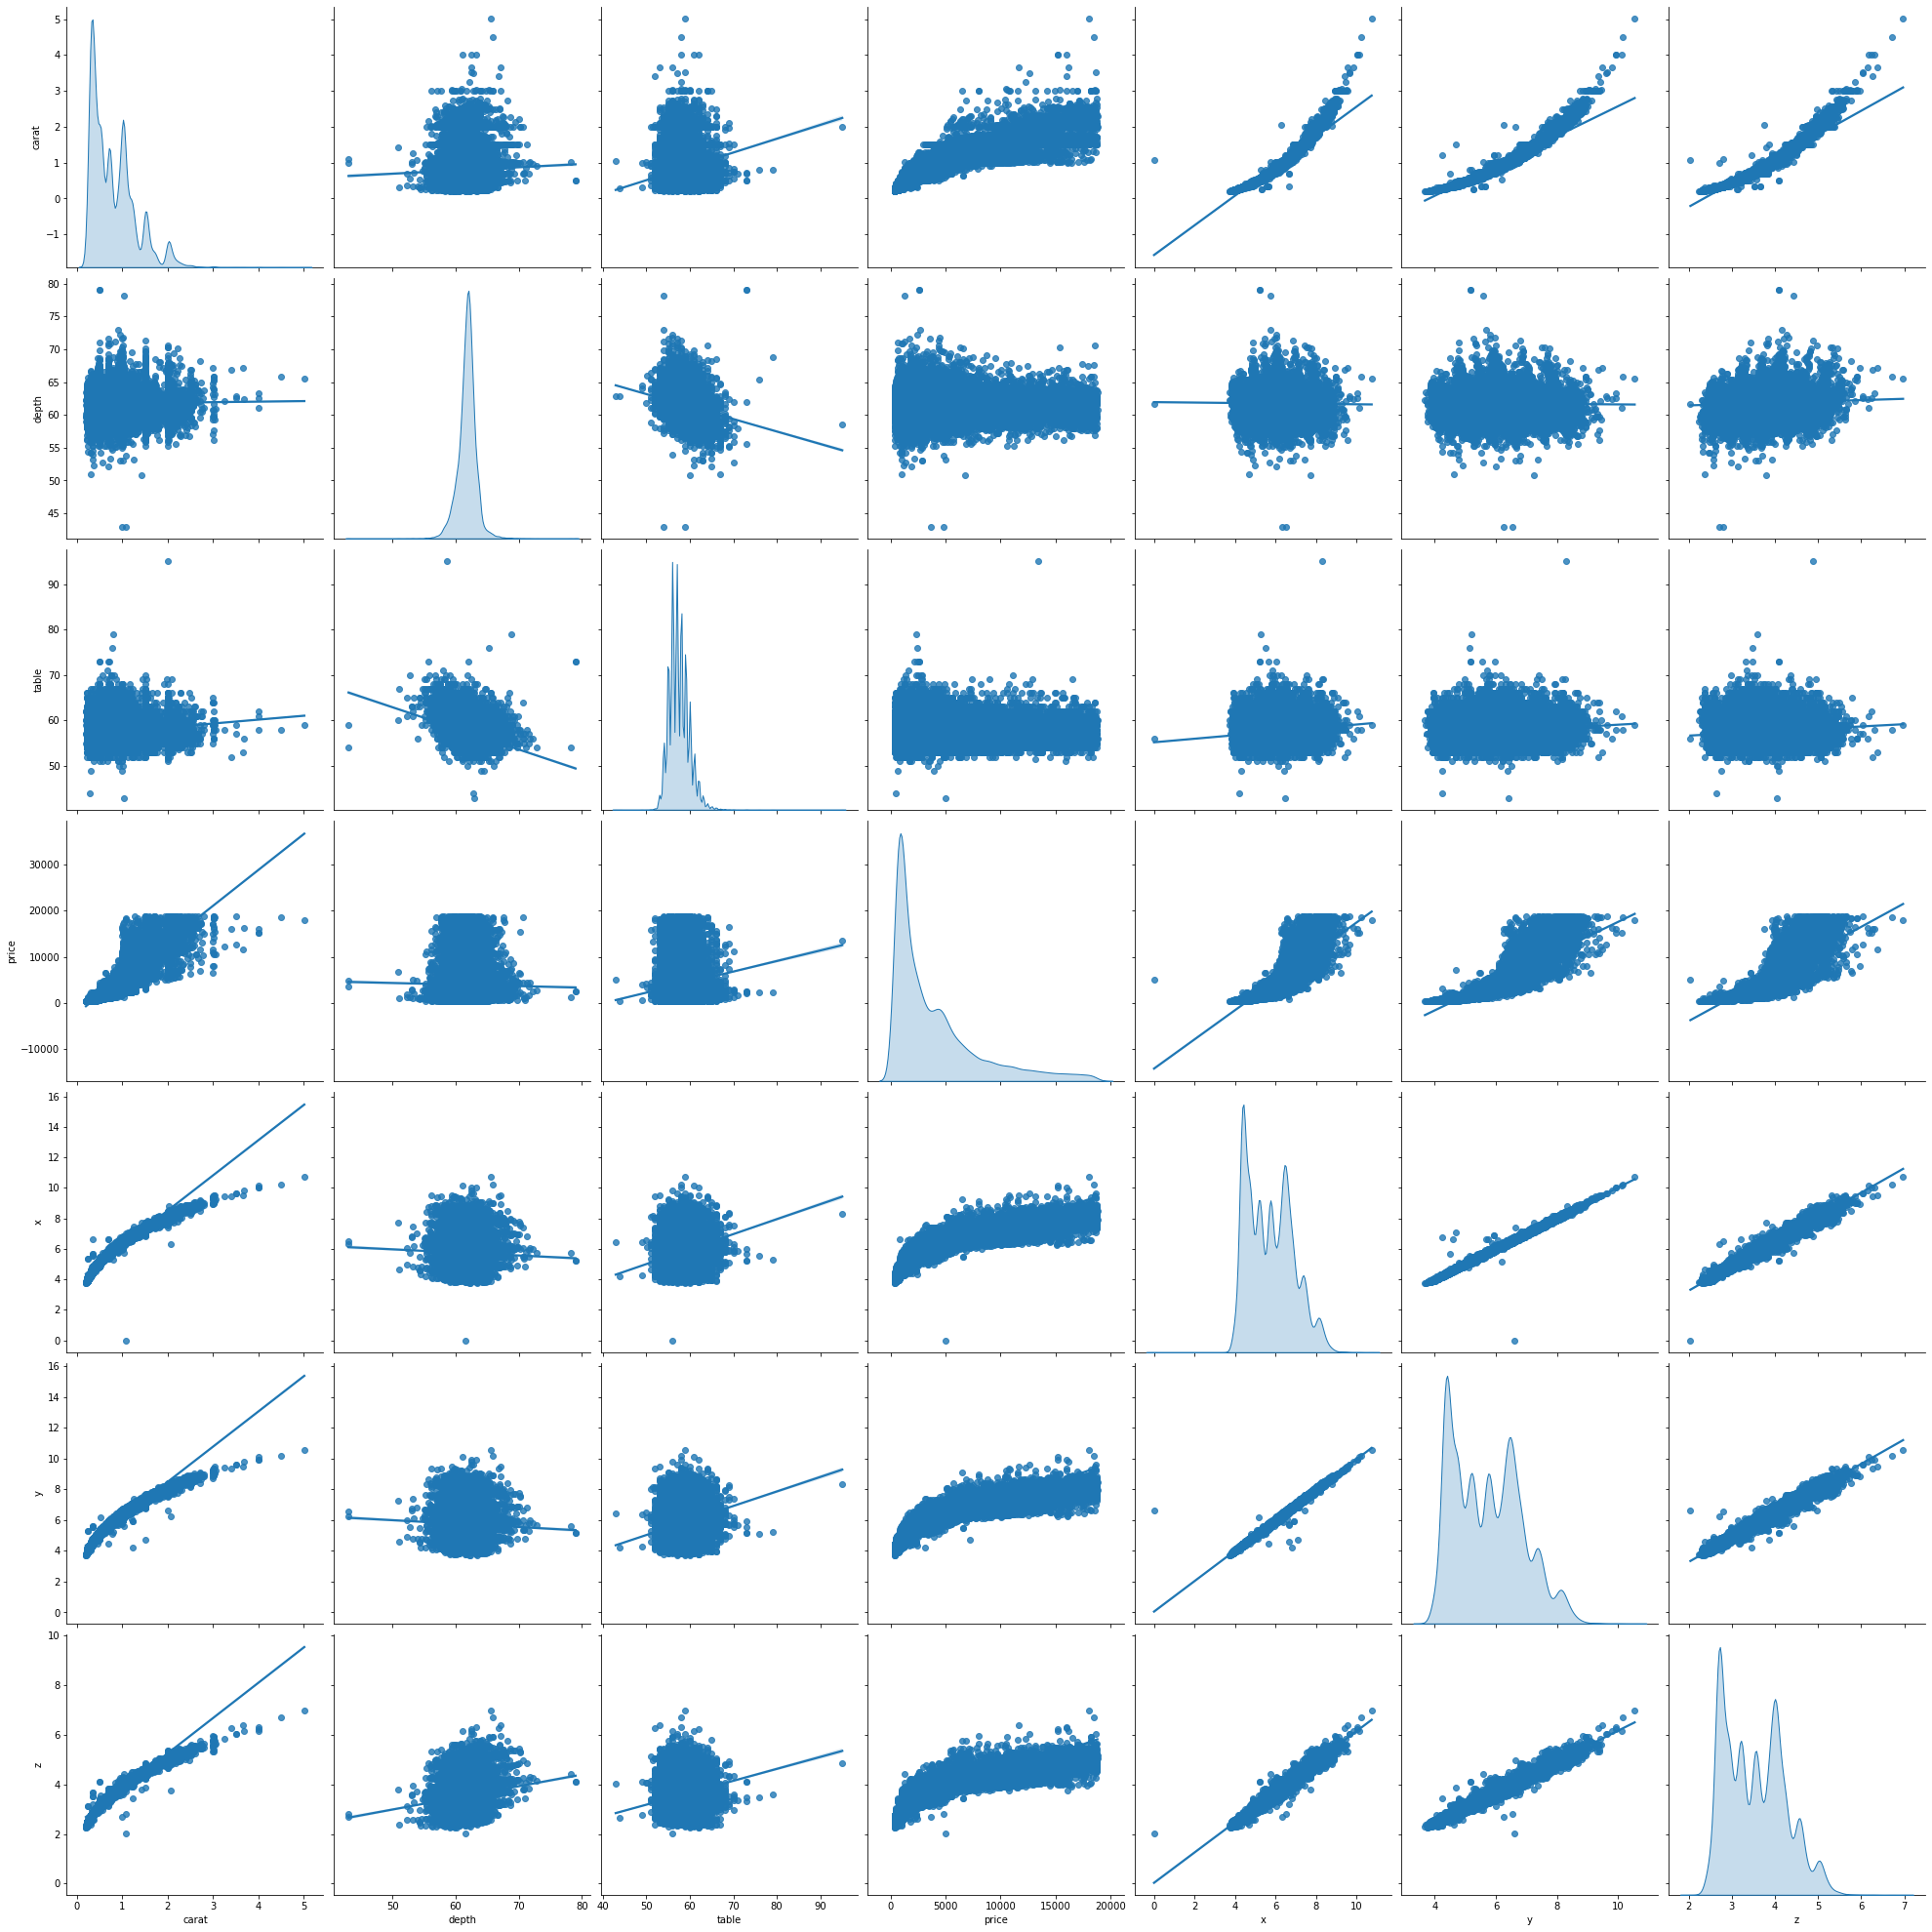

In [4]:
sns.pairplot(data = diamonds, diag_kind = 'kde', kind = 'reg', height = 4)

<AxesSubplot:xlabel='carat', ylabel='price'>

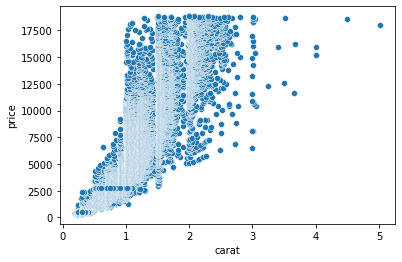

In [79]:
sns.scatterplot(data = diamonds, x = 'carat', y = 'price')

<AxesSubplot:xlabel='cut', ylabel='depth'>

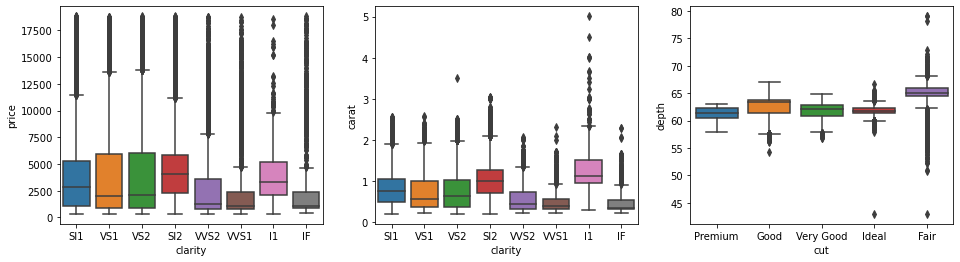

In [152]:
fig, ax = plt.subplots(1,3, figsize = (16,4))
sns.boxplot(data = diamonds, x = 'clarity', y = 'price', ax=ax[0])
sns.boxplot(data = diamonds, x = 'clarity', y = 'carat', ax=ax[1])
sns.boxplot(data = diamonds, x = 'cut', y = 'depth', ax=ax[2])

<AxesSubplot:xlabel='carat', ylabel='price'>

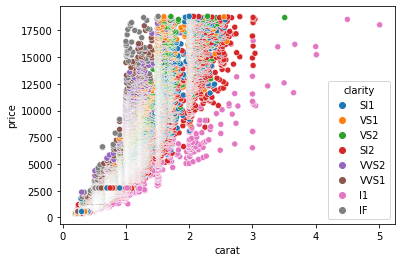

In [81]:
sns.scatterplot(data = diamonds, x = 'carat', y = 'price', hue='clarity')

<AxesSubplot:xlabel='carat', ylabel='price'>

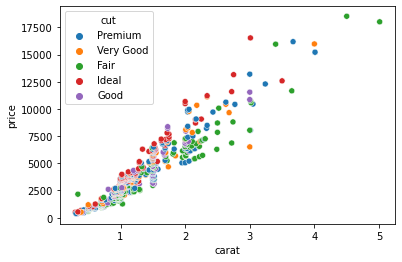

In [143]:
sns.scatterplot(data = diamonds[diamonds['clarity']=='I1'], x = 'carat', y = 'price', hue='cut')

In [76]:
diamondscla = diamonds.groupby('clarity')
diamondsclaI1=diamonds[diamonds['clarity']=='I1']

<AxesSubplot:xlabel='depth', ylabel='price'>

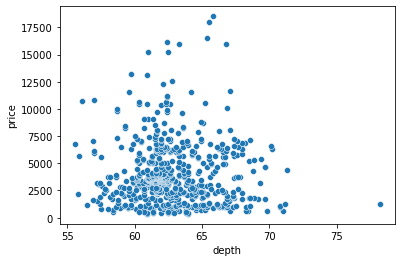

In [146]:
sns.scatterplot(data = diamondsclaI1, x = 'depth', y = 'price')

<AxesSubplot:xlabel='price', ylabel='depth'>

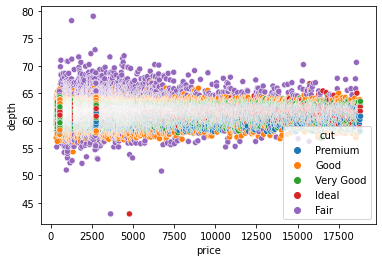

In [147]:
sns.scatterplot(data = diamonds, x = 'price', y = 'depth', hue='cut')

<AxesSubplot:xlabel='price', ylabel='depth'>

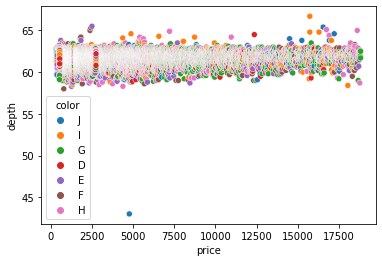

In [158]:
sns.scatterplot(data = diamonds[diamonds['cut']=='Ideal'], x = 'price', y = 'depth',hue='color')

In [159]:
diamonds = diamonds.join(pd.get_dummies(diamonds['cut'], prefix = 'cut'))
diamonds = diamonds.join(pd.get_dummies(diamonds['color'], prefix = 'color'))
diamonds = diamonds.join(pd.get_dummies(diamonds['clarity'], prefix = 'clarity'))
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,...,0,0,0,0,1,0,0,0,0,0
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,...,0,0,0,0,1,0,0,0,0,0
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,...,0,0,0,0,1,0,0,0,0,0
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,...,0,0,0,0,1,0,0,0,0,0


In [163]:
pd.get_dummies(diamonds['cut'], prefix = 'cut')

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
48935,0,0,0,1,0
48936,0,0,1,0,0
48937,0,1,0,0,0
48938,0,0,0,0,1


In [205]:
X = sm.add_constant(diamonds[['carat','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','x','y','z']])
Y = diamonds['price']
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 2.962e+04
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:37:02   Log-Likelihood:            -4.1860e+05
No. Observations:               48932   AIC:                         8.372e+05
Df Residuals:                   48916   BIC:                         8.374e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           455.4727     75.962      5.996      0.000     306.586     604.359
carat          1.069e+04     59.841    178.656      0.000    1.06e+04    1.08e+04
clarity_I1    -3623.4368     45.926    -78.898      0.000   -3713.452   -3533.422
clarity_IF     1461.0725     29.994     48.712      0.000    1402.283    1519.862
clarity_SI1     -79.8059     17.212     -4.637      0.000    -113.542     -46.070
clarity_SI2    -924.5977     18.735    -49.351      0.000    -961.319    -887.876
clarity_VS1     728.0658     18.250     39.894      0.000     692.296     763.836
clarity_VS2     512.0566     16.725     30.617      0.000     479.276     544.837
clarity_VVS1   1174.8464     22.432     52.374      0.000    1130.879    1218.814
clarity_VVS2   1207.2717     20.270     59.561      0.000    1167.543    1247.000
cut_Fair       -436.9170     33.480    -13.050      0.000    -502.539    -371.295
cut_Good         52.8491     22.975      2.300      0.021       7.817      97.881
cut_Ideal       384.0853     18.520     20.739      0.000     347.785     420.385
cut_Premium     246.3517     19.259     12.792      0.000     208.604     284.099
cut_Very Good   209.1035     19.796     10.563      0.000     170.303     247.904
x             -1072.1150    101.184    -10.596      0.000   -1270.437    -873.793
y               957.4313     98.968      9.674      0.000     763.453    1151.410
z             -1382.9734     72.428    -19.094      0.000   -1524.933   -1241.013
==============================================================================
Omnibus:                    13306.983   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           277567.976
Skew:                           0.803   Prob(JB):                         0.00
Kurtosis:                      14.557   Cond. No.                     9.29e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.72e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [206]:
modelo = LinearRegression()
lm_fit = modelo.fit(X,Y)
pred_price = modelo.predict(X)

In [207]:
mean_squared_error(Y,pred_price)

1577749.5823303596

In [208]:
r2_score(Y,pred_price)

0.9008133880059671

In [209]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')
rick_diamonds = rick_diamonds.join(pd.get_dummies(rick_diamonds['cut'], prefix = 'cut'))
rick_diamonds = rick_diamonds.join(pd.get_dummies(rick_diamonds['color'], prefix = 'color'))
rick_diamonds = rick_diamonds.join(pd.get_dummies(rick_diamonds['clarity'], prefix = 'clarity'))
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,0,...,0,0,0,0,0,1,0,0,0,0
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,0,...,0,0,0,0,0,0,0,1,0,0
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,0,...,0,0,0,0,0,0,0,1,0,0
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,0,...,0,0,0,0,0,0,1,0,0,0
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,0,...,0,0,0,0,0,1,0,0,0,0
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,0,...,0,0,0,0,0,0,0,0,0,1
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,0,...,0,0,0,0,1,0,0,0,0,0
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
Rick_X = sm.add_constant(diamonds[['carat','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','x','y','z']])
modelo = LinearRegression()
lm_fit = modelo.fit(X,Y)
pred_price = modelo.predict(Rick_X)

In [211]:
mean_squared_error(Y,pred_price)

1577749.5823303596

In [212]:
r2_score(Y,pred_price)

0.9008133880059671